# Sensitivity analysis to cost models
Water demands can be met by numerous sources of water. AWASH performs the allocation of water by solving an optimization problem resulting in the least costly solution to meet water demands under the environmental constraints. In this notebook, we conduct a sensitivity analysis to the choice of cost model for water. 


## Impact on optimize-allocation
Water use estimates are generally known at facility-, municipality- or county-level (e.g. USGS). To relate these numbers to the natural system, an optimization problem is solved to determine the withdrawals at each canals linking nodes of the network (gauges) to the counties, and groundwater extractions.

Two situations are considered here: 1. cost is uniform, 2. cost is proportional to the relative elevation of the point of source and point of use. We explore four scenarios:

A. SW: 1 | GW: 1

B. SW: 2 | GW: 1

C. SW: 1 | GW: 2

D. SW: 2 | GW: 2


In [1]:
cd("../../src/");
include("nui.jl");
include("lib/readconfig.jl");
config = readconfig("../configs/standard-1year.yml")
# setting extraction cost to 0 (option 1: cost is uniform)
config["watercost-extraction"] = false;
config["watercost-treatment"] = false;
include("optimize-waterallocation.jl");
include("simulate.jl");
# getting volumes and costs at the county level from the simulation
sw11 = getdata(:Allocation, :swsupply);
swc11 = getdata(:WaterCost, :swcost);
gw11 = getdata(:Allocation, :gwsupply);
gwc11 = getdata(:WaterCost, :gwcost);

┌──────────────────────────────────────────────────┐
│    ▄▄    ▄▄      ▄▄    ▄▄       ▄▄▄▄    ▄▄    ▄▄ │
│   ████   ██      ██   ████    ▄█▀▀▀▀█   ██    ██ │
│   ████   ▀█▄ ██ ▄█▀   ████    ██▄       ██    ██ │
│  ██  ██   ██ ██ ██   ██  ██    ▀████▄   ████████ │
│  ██████   ███▀▀███   ██████        ▀██  ██    ██ │
│ ▄██  ██▄  ███  ███  ▄██  ██▄  █▄▄▄▄▄█▀  ██    ██ │
│ ▀▀    ▀▀  ▀▀▀  ▀▀▀  ▀▀    ▀▀   ▀▀▀▀▀    ▀▀    ▀▀ │
└──────────────────────────────────────────────────┘

Welcome to AWASH, the America's Water Model, version 0.7.



Loading from saved region network...


  likely near /home/laureline/.julia/v0.4/Graphs/src/common.jl:3
  likely near /home/laureline/.julia/v0.4/Graphs/src/dot.jl:80


Loading from saved water network...
Optimize a model with 68238 rows, 112306 columns and 3739174 nonzeros
Coefficient statistics:
  Matrix range    [1e+00, 1e+00]
  Objective range [6e+00, 1e+06]
  Bounds range    [0e+00, 0e+00]
  RHS range       [7e-02, 2e+06]

Concurrent LP optimizer: dual simplex and barrier
Showing barrier log only...

Presolve removed 17387 rows and 18700 columns
Presolve time: 1.29s
Presolved: 50851 rows, 93606 columns, 2319548 nonzeros

Ordering time: 0.10s

Barrier statistics:
 AA' NZ     : 1.422e+06
 Factor NZ  : 1.844e+06 (roughly 70 MBytes of memory)
 Factor Ops : 1.044e+08 (less than 1 second per iteration)
 Threads    : 1

Barrier performed 0 iterations in 2.00 seconds
Barrier solve interrupted - model solved by another algorithm


Solved with dual simplex
Solved in 16252 iterations and 2.17 seconds
Optimal objective  1.270618071e+10
  4.237626 seconds (3.84 M allocations: 292.547 MB, 3.28% gc time)
Loading from saved region network...
Loading from saved w

Creating model...


Running model...


Missing canal.09475501
Missing usgs.11230500
Missing usgs.11075720
Missing usgs.11075720
Missing usgs.11063000
Missing usgs.11063000
Missing usgs.11413320
Missing reservoir.1894
Missing canal.02248600
Missing reservoir.2696
Missing canal.02248600
Missing reservoir.2684
Missing reservoir.737
Missing usgs.03337000
Missing usgs.01396580
Missing usgs.01396580
Missing usgs.01356190
Missing usgs.01446775
Missing usgs.01432000
Missing usgs.03433640
Missing usgs.09277800
Missing reservoir.1286
Missing usgs.01659000
Missing usgs.12396900
Missing usgs.12181100
Missing canal.0208463140
Missing canal.02280500
Missing canal.02280500
Missing canal.08437600
Missing canal.09475501
Missing canal.09522701
Missing canal.10170700
Missing canal.09475501
Missing canal.09522701
Missing usgs.11230500
Missing usgs.11075720
Missing usgs.11075720
Missing usgs.11063000
Missing usgs.11413320
Missing reservoir.1894
Missing reservoir.2696
Missing canal.02248600
Missing canal.02280500
Missing reservoir.737
Missing us

In [2]:
# setting extraction cost proportional to relative elevation (option 2)
config["watercost-extraction"] = true;
config["watercost-treatment"] = false;

include("optimize-waterallocation.jl");
include("simulate.jl");
# getting volumes and costs at the county level from the simulation
sw22 = getdata(:Allocation, :swsupply);
swc22 = getdata(:WaterCost, :swcost);
gw22 = getdata(:Allocation, :gwsupply);
gwc22 = getdata(:WaterCost, :gwcost);

Loading from saved region network...
Loading from saved water network...


Loading extraction cost from saved data...


Optimize a model with 68238 rows, 112306 columns and 3739174 nonzeros
Coefficient statistics:
  Matrix range    [1e+00, 1e+00]
  Objective range [5e+00, 1e+06]
  Bounds range    [0e+00, 0e+00]
  RHS range       [7e-02, 2e+06]

Concurrent LP optimizer: dual simplex and barrier
Showing barrier log only...

Presolve removed 18481 rows and 22882 columns
Presolve time: 1.80s
Presolved: 49757 rows, 89424 columns, 2271822 nonzeros

Ordering time: 0.11s

Barrier statistics:
 AA' NZ     : 1.411e+06
 Factor NZ  : 1.826e+06 (roughly 70 MBytes of memory)
 Factor Ops : 1.037e+08 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   2.34633561e+12  1.27941698e+10  3.24e+08 2.10e+02  6.66e+08     3s
   1   1.30948682e+12 -1.86973705e+11  9.42e+07 1.39e+02  2.03e+08     3s
   2   6.10310409e+11 -2.46506424e+11  1.83e+07 2.72e+01  4.53e+07     3s
   3   1.71095908e+11 -1.95

Loading from saved region network...
Loading from saved water network...
Loading from saved region network...


Creating model...


Loading extraction cost from saved data...


Running model...


Missing canal.09475501
Missing usgs.11230500
Missing usgs.11075720
Missing usgs.11075720
Missing usgs.11063000
Missing usgs.11413320
Missing reservoir.1894
Missing reservoir.2684
Missing reservoir.737
Missing usgs.03337000
Missing usgs.01403535
Missing usgs.01403535
Missing usgs.01356190
Missing usgs.01432000
Missing usgs.03433640
Missing canal.08437600
Missing usgs.09277800
Missing reservoir.1286
Missing usgs.01659000
Missing usgs.12396900
Missing usgs.12181100
Missing canal.0208463140
Missing canal.02248600
Missing canal.02280500
Missing canal.02280500
Missing canal.02280500
Missing usgs.11063000
Missing canal.09475501
Missing canal.10170700
Missing usgs.11230500
Missing usgs.11075720
Missing usgs.11075720
Missing usgs.11063000
Missing usgs.11063000
Missing usgs.11413320
Missing reservoir.1894
Missing canal.02280500
Missing reservoir.737
Missing usgs.03337000
Missing usgs.01403535
Missing usgs.01403535
Missing usgs.01356190
Missing usgs.01432000
Missing usgs.03433640
Missing canal.08

In [3]:
# comparison with usgs estimates - loading the data
recorded = readtable(datapath("extraction/USGS-2010.csv"));
swusgs = recorded[:, :TO_SW] * 1383. / 12 *config["timestep"] * numsteps;
gwusgs = recorded[:, :TO_GW] * 1383. / 12 *config["timestep"] * numsteps;

In [4]:
# verifying that demands are met
include("mapping.jl")
println("Total differences between USGS and model case 1: ", sum(abs(swusgs.data+gwusgs.data-sum(sw11+gw11,2))), " 1000m3")
println("Total differences between USGS and model case 2: ", sum(abs(swusgs.data+gwusgs.data-sum(sw22+gw22,2))), " 1000m3")
#mapdatacty(swusgs.data -sum(sw2+supw2,2), true)

Total differences between USGS and model case 1: 13.830000045621551 1000m3
Total differences between USGS and model case 2: 13.830000048780226 1000m3


In [5]:
# comparing case 11 and case 22
println("Total volume model case 11: ", sum(gw11)+sum(sw11), " 1000m3")
println("Total volume model case 22: ", sum(gw22)+sum(sw22), " 1000m3")

println("Total sw volume model case 11: ", sum(sw11), " 1000m3")
println("Total sw volume model case 22: ", sum(sw22), " 1000m3")
println("Total gw volume model case 11: ", sum(gw11), " 1000m3")
println("Total gw volume model case 22: ", sum(gw22), " 1000m3")

println("Total sw volume differences between model case 11 and 22: ", sum(abs(sw11-sw22)), " 1000m3")
println("Total gw volume differences between model case 11 and 22: ", sum(abs(gw11-gw22)), " 1000m3")

Total volume model case 11: 4.827344350799999e8 1000m3
Total volume model case 22: 4.8273443508000004e8 1000m3
Total sw volume model case 11: 3.8364580777232844e8 1000m3
Total sw volume model case 22: 3.57972015530369e8 1000m3
Total gw volume model case 11: 9.908862730767152e7 1000m3
Total gw volume model case 22: 1.2476241954963103e8 1000m3
Total sw volume differences between model case 11 and 22: 9.733247556516558e7 1000m3
Total gw volume differences between model case 11 and 22: 9.733247556516556e7 1000m3


### Comparison of the results


-----------------------------------------------------------
PBS Mapping 2.69.76 -- Copyright (C) 2003-2016 Fisheries and Oceans Canada

PBS Mapping comes with ABSOLUTELY NO WARRANTY;
for details see the file COPYING.
This is free software, and you are welcome to redistribute
it under certain conditions, as outlined in the above file.

A complete user guide 'PBSmapping-UG.pdf' is located at 
/home/laureline/anaconda2/lib/R/library/PBSmapping/doc/PBSmapping-UG.pdf

Packaged on 2015-04-23
Pacific Biological Station, Nanaimo

All available PBS packages can be found at
http://code.google.com/p/pbs-software/

To see demos, type '.PBSfigs()'.
-----------------------------------------------------------


Loading required package: sp
Checking rgeos availability: TRUE
Loading required package: foreign


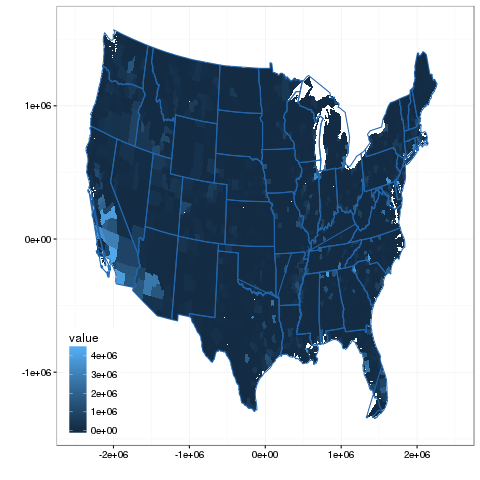

RCall.RObject{RCall.VecSxp}


In [6]:
# Reliance sw option 11
mapdatacty(sum(sw11,2))

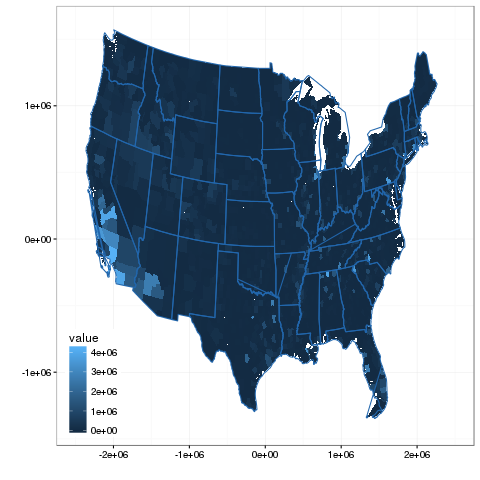

RCall.RObject{RCall.VecSxp}


In [7]:
# Reliance sw option 22
mapdatacty(sum(sw22,2))

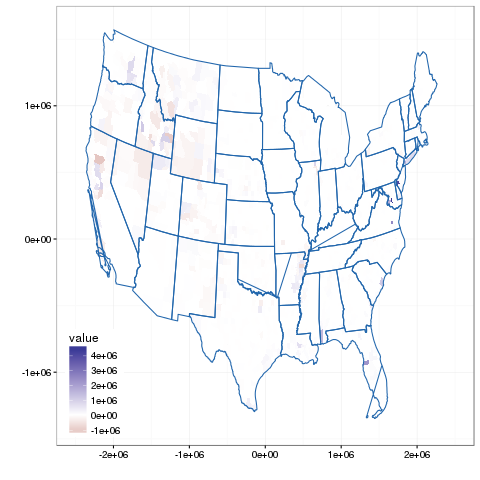

RCall.RObject{RCall.VecSxp}


In [8]:
# Comparison of reliance on surface water between option 11 and 22
mapdatacty(sum(sw11-sw22,2),true)

Counties in red use more surface water when extraction costs are taken in consideration. 

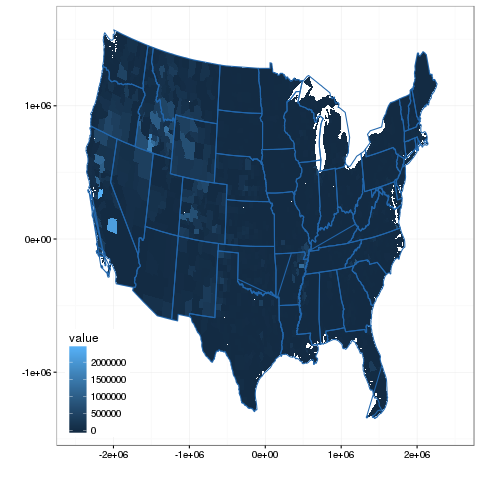

RCall.RObject{RCall.VecSxp}


In [9]:
# Reliance gw option 11
mapdatacty(sum(gw11,2))

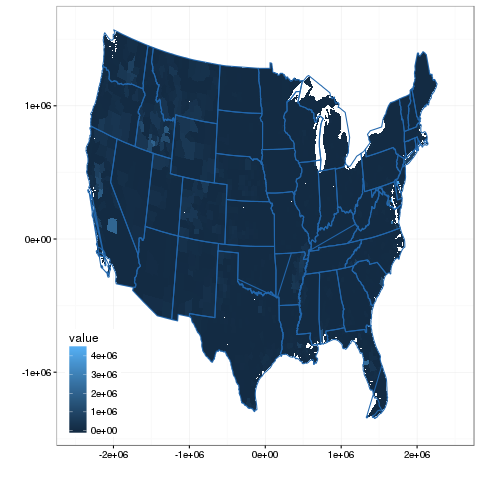

RCall.RObject{RCall.VecSxp}


In [10]:
# Reliance gw option 22
mapdatacty(sum(gw22,2))

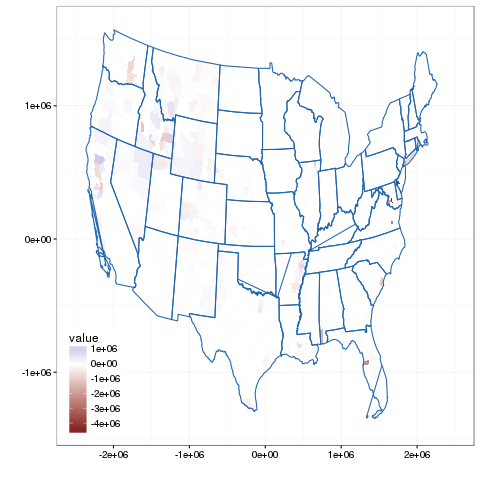

RCall.RObject{RCall.VecSxp}


In [11]:
# Comparison of reliance on groundwater between option 11 and 22
mapdatacty(sum(gw11-gw22,2),true)

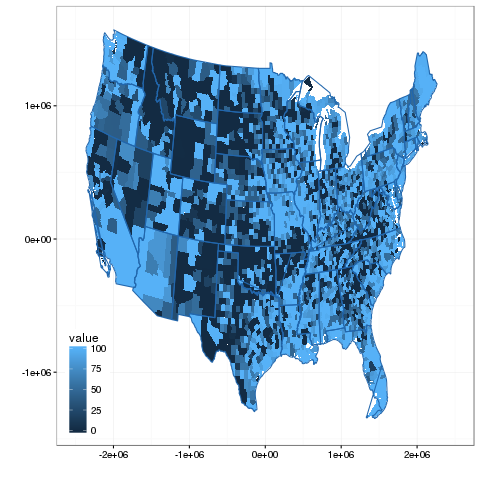

RCall.RObject{RCall.VecSxp}


In [12]:
# Percentage of sw option 11
mapdatacty(sum(sw11,2)./sum(sw11+gw11,2)*100)

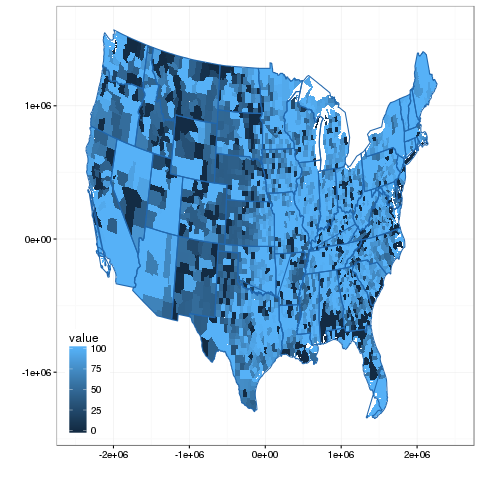

RCall.RObject{RCall.VecSxp}


In [13]:
# Percentage of sw option 22
mapdatacty(sum(sw22,2)./sum(sw22+gw22,2)*100)

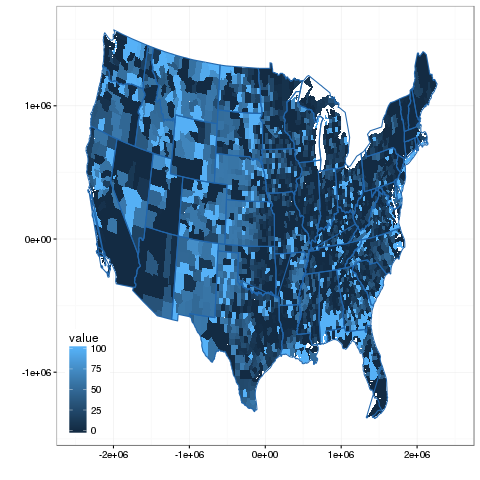

RCall.RObject{RCall.VecSxp}


In [14]:
# Percentage of sw option 22
mapdatacty(sum(gw22,2)./sum(sw22+gw22,2)*100)

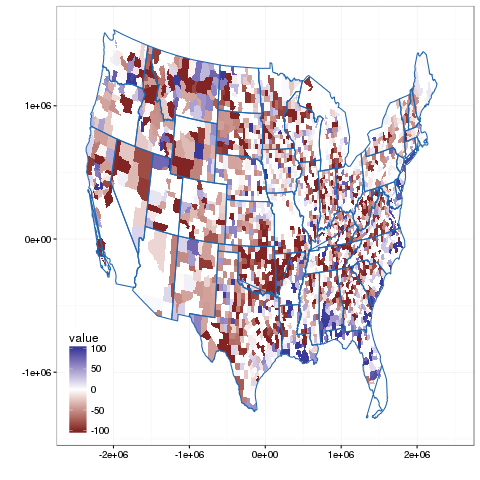

RCall.RObject{RCall.VecSxp}


In [15]:
# Comparison percentage of reliance on surface water
mapdatacty(sum(sw11,2)./sum(sw11+gw11,2)*100-sum(sw22,2)./sum(sw22+gw22,2)*100, true)

We see that when we do consider extraction cost, counties bordering the atlantic ocean are relying entirely on gw.

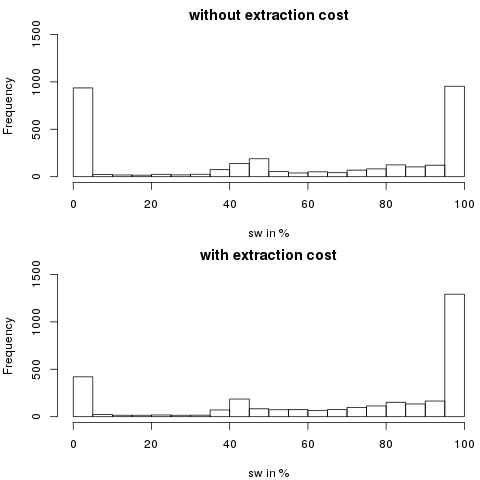

In [16]:
R"par(mfrow=c(2,1))"
R"par(mar=c(4,4,2,0))"
sw11prct = sum(sw11,2)./sum(sw11+gw11,2)*100
sw22prct = sum(sw22,2)./sum(sw22+gw22,2)*100
R"hist($sw11prct, xlab='sw in %', main='without extraction cost',breaks=20,ylim=c(0,1500))";
R"hist($sw22prct, xlab='sw in %', main='with extraction cost',breaks=20,ylim=c(0,1500))";

Hereafter, we investigate how this depends on the quantity of demanded water.

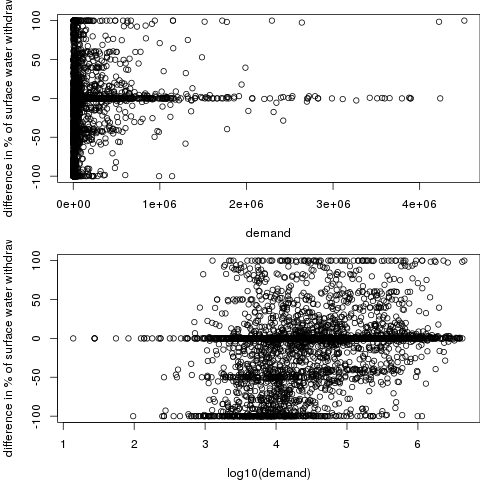

In [17]:
R"par(mfrow=c(2,1))"
R"par(mar=c(4,4,1,0))"
x = swusgs + gwusgs;
R"plot($x,$sw11prct-$sw22prct, xlab = 'demand', ylab = 'difference in % of surface water withdrawals')";
x = log10(swusgs + gwusgs);
R"plot($x,$sw11prct-$sw22prct, xlab = 'log10(demand)', ylab = 'difference in % of surface water withdrawals')";

A few of the very large users (> 1e9 m3/year), who rely on surface water in case 11, are using groundwater in case 22. I do not believe it is possible to conclude anything else. 

##### Cost of water
The last aspect is the cost of water. We plot hereafter the cost per 1000m3 of water to understand where it was not possible to withdraw water without pumping water uphill

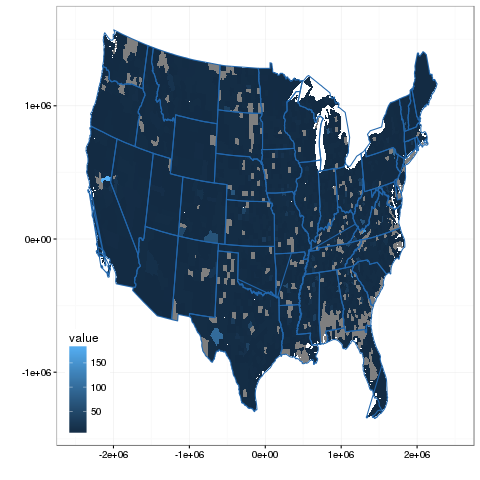

RCall.RObject{RCall.VecSxp}


In [18]:
# Surface water extraction cost per 1000m3
mapdatacty(sum(swc22,2)./sum(sw22,2))

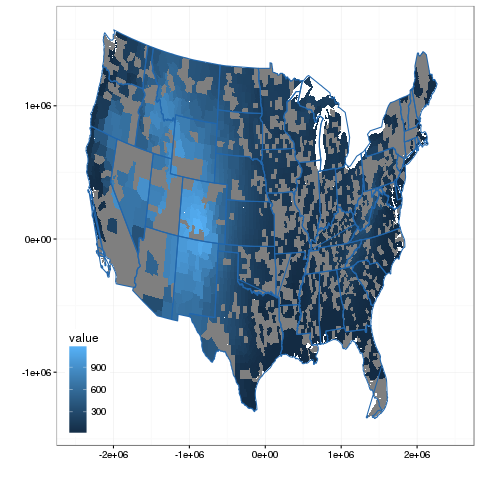

RCall.RObject{RCall.VecSxp}


In [19]:
# Ground water extraction cost per 1000m3
mapdatacty(sum(gwc22,2)./sum(gw22,2))

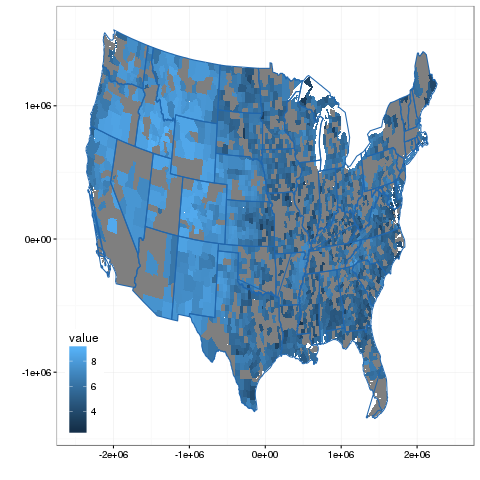

RCall.RObject{RCall.VecSxp}


In [20]:
# Ground water extraction cost per 1000m3
mapdatacty(log10(sum(gwc22,2)))